In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

# DATASET  ORIGINAL FILE

In [2]:
df=pd.read_csv('Data file.csv')

In [3]:
df.shape

(209593, 37)

# DATASET FILE AFTER DATA CLEANING

In [4]:
df1=pd.read_csv('Data file3.csv')

In [5]:
df1.shape

(193576, 37)

# PERCENTAGE OF DATA LOST

In [36]:
(209593-193576)/209593*100

7.64195369120152

In [6]:
df2 = df1.drop(columns=['Unnamed: 0','msisdn','pcircle', 'pdate'])
df2.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2,0,1539,2,...,2,12,6.0,0.0,2,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20,0,5787,1,...,1,12,12.0,0.0,1,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3,0,1539,1,...,1,6,6.0,0.0,1,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41,0,947,0,...,2,12,6.0,0.0,2,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4,0,2309,7,...,7,42,6.0,0.0,7,42,6,0.0,2.333333,2.333333


# CORRELATION MATRIX AFTER DATA CLEANING

In [34]:
#correlation matrix
corr = df2.corr()

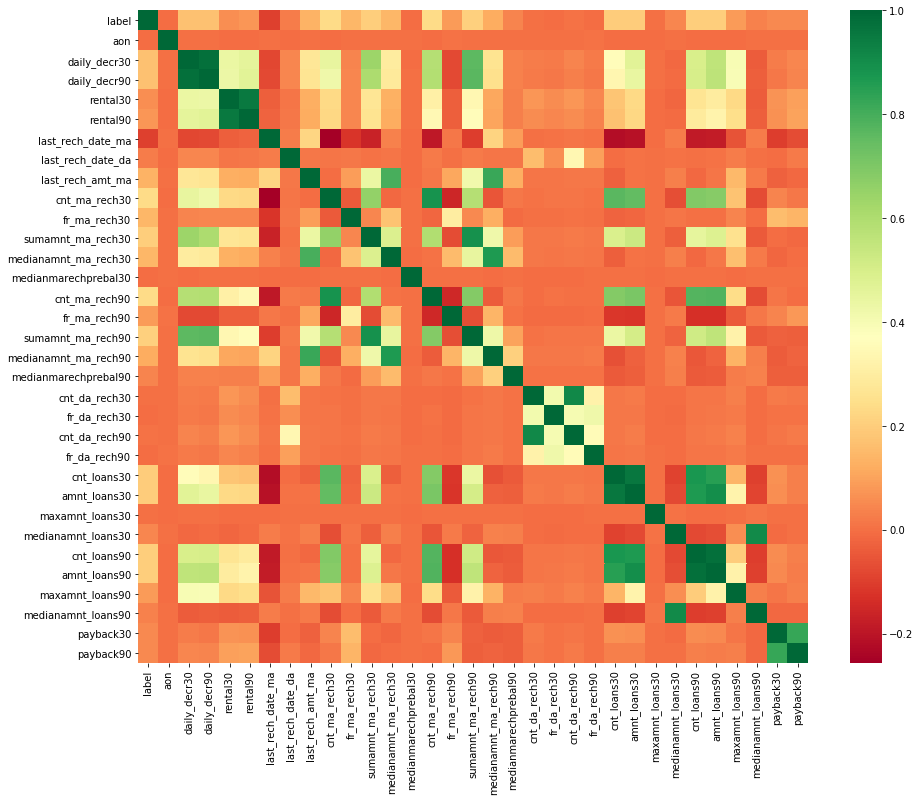

In [35]:
#to show the correlation in diagramatic 
import seaborn as sns
plt.figure(figsize=(15,12))     #(column,row)
sns.heatmap(corr,cmap='RdYlGn')

In [7]:
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# 1. LOGISTIC REGRESSION

In [8]:
#Importing libraties and classes
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
# Train - Test split
#just drop the outcome columns
#specify  input and output attributes
#X is the input and y is the output
X = df2.drop(columns=['label'], axis=1)
y = df2['label']

In [10]:
#Importing libraries and classes
#Dividing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
#Training the model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#Training Accuracy
model.score(X_train,y_train)

0.872179951735386

In [13]:
#Testing Accuracy
model.score(X_test,y_test)

0.8699567785373582

In [14]:
expected = y_test
predicted = model.predict(X_test)

In [15]:
#Import librarires and classes
from sklearn import metrics

In [16]:
#Printing the Report
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.46      0.19      0.27      7305
           1       0.89      0.97      0.93     50768

    accuracy                           0.87     58073
   macro avg       0.68      0.58      0.60     58073
weighted avg       0.84      0.87      0.85     58073



# 2. NAIVE BAYES

In [17]:
#Importing libraties and classes
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

In [18]:
#Training the model
model2.fit(X_train,y_train)

expected2 = y_test
predicted2 = model2.predict(X_test)

In [19]:
#Import librarires and classes
from sklearn import metrics

#Printing the Report
print(metrics.classification_report(expected2,predicted2))

#Out of outcomes,were right and were wrong similarly,For 'N',were right and were wrong
print(metrics.confusion_matrix(expected2,predicted2))

              precision    recall  f1-score   support

           0       0.21      0.90      0.34      7305
           1       0.97      0.50      0.66     50768

    accuracy                           0.55     58073
   macro avg       0.59      0.70      0.50     58073
weighted avg       0.88      0.55      0.62     58073

[[ 6554   751]
 [25233 25535]]


# 3. STOCHASTIC GRADIENT DESCENT

In [20]:
#Importing libraties and classes
from sklearn.linear_model import SGDClassifier
model3 = SGDClassifier(loss='modified_huber',shuffle=True,random_state=0)

In [21]:
#Training the model
model3.fit(X_train,y_train)

expected3 = y_test
predicted3 = model3.predict(X_test)

In [22]:
#Import librarires and classes
from sklearn import metrics

#Printing the Report
print(metrics.classification_report(expected3,predicted3))

#Out of outcomes,were right and were wrong similarly,For 'N',were right and were wrong
print(metrics.confusion_matrix(expected3,predicted3))

              precision    recall  f1-score   support

           0       0.28      0.34      0.31      7305
           1       0.90      0.87      0.89     50768

    accuracy                           0.81     58073
   macro avg       0.59      0.61      0.60     58073
weighted avg       0.82      0.81      0.82     58073

[[ 2514  4791]
 [ 6401 44367]]


# 4. K NEIGHBOUR CLASSIFIER

In [23]:
#Importing libraties and classes
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=15)

In [24]:
#Training the model
model4.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [25]:
expected4 = y_test
predicted4 = model4.predict(X_test)

In [26]:
#Import librarires and classes
from sklearn import metrics

#Printing the Report
print(metrics.classification_report(expected4,predicted4))

#Out of outcomes,were right and were wrong similarly,For 'N',were right and were wrong
print(metrics.confusion_matrix(expected4,predicted4))

              precision    recall  f1-score   support

           0       0.61      0.31      0.41      7305
           1       0.91      0.97      0.94     50768

    accuracy                           0.89     58073
   macro avg       0.76      0.64      0.67     58073
weighted avg       0.87      0.89      0.87     58073

[[ 2244  5061]
 [ 1435 49333]]


# 5. DECISION TREE CLASSIFIER

In [30]:
#Importing libraties and classes
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None,min_samples_leaf=15)

In [31]:
#Training the model
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [32]:
expected5 = y_test
predicted5 = model5.predict(X_test)

In [33]:
#Import librarires and classes
from sklearn import metrics

#Printing the Report
print(metrics.classification_report(expected5,predicted5))

#Out of outcomes,were right and were wrong similarly,For 'N',were right and were wrong
print(metrics.confusion_matrix(expected5,predicted5))

              precision    recall  f1-score   support

           0       0.74      0.42      0.54      7305
           1       0.92      0.98      0.95     50768

    accuracy                           0.91     58073
   macro avg       0.83      0.70      0.74     58073
weighted avg       0.90      0.91      0.90     58073

[[ 3055  4250]
 [ 1048 49720]]


# 6. RANDOM FOREST CLASSIFIER

In [27]:
#Importing libraties and classes
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=101,max_features=None,min_samples_leaf=30)

In [28]:
#Training the model
model6.fit(X_train,y_train)

expected6 = y_test
predicted6 = model6.predict(X_test)

In [29]:
#Import librarires and classes
from sklearn import metrics

#Printing the Report
print(metrics.classification_report(expected6,predicted6))

#Out of outcomes,were right and were wrong similarly,For 'N',were right and were wrong
print(metrics.confusion_matrix(expected6,predicted6))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55      7305
           1       0.92      0.98      0.95     50768

    accuracy                           0.91     58073
   macro avg       0.85      0.70      0.75     58073
weighted avg       0.90      0.91      0.90     58073

[[ 3079  4226]
 [  845 49923]]


# RANDOM FOREST CLASSIFIER AND DECISION TREE CLASSIFIER BOTH ARE HAVIG GOOD ACCURACY OF 91%